In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import normalize

sns.set_style('darkgrid')

In [2]:
raw_data = pd.read_excel('/Users/shanewang/Desktop/lyf/分录数据.xls',
                    index_col=None, sheet_name='Sheet2')
data = raw_data.copy(deep=True)
data.head()

,ZWPZFL_DWBH（单位编号）,（凭证内码）ZWPZFL_PZNM,（分录内码）ZWPZFL_FLNM,（分录编号）ZWPZFL_FLBH,（科目编号）ZWPZFL_KMBH,（摘要）ZWPZFL_ZY,（金额）ZWPZFL_JE,（记账方向）ZWPZFL_JZFX,（对方科目）ZWPZFL_DFKM,ZWPZFL_DFKMYJ
0,A63118930507000000,17,38,1,1002003001,收到天津东丽项目工程款,1753013.0,1,1.004001e+06,1004.0
1,A63118930507000000,17,39,2,1004001,收到天津东丽项目工程款,1753013.0,2,1.002003e+09,1002.0
2,A63118930507000000,16,40,1,1002003001,收到高雅机电有限公司履约保证金,5000.0,1,1.004001e+06,1004.0
3,A63118930507000000,16,41,2,1004001,收到高雅机电有限公司履约保证金,5000.0,2,1.002003e+09,1002.0
4,A63118930507000000,14,48,1,1002003001,收到大宁中心项目工程款,9632017.0,1,1.004001e+06,1004.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62054 entries, 0 to 62053
Data columns (total 10 columns):
ZWPZFL_DWBH（单位编号）    62054 non-null object
（凭证内码）ZWPZFL_PZNM    62054 non-null int64
（分录内码）ZWPZFL_FLNM    62054 non-null int64
（分录编号）ZWPZFL_FLBH    62054 non-null int64
（科目编号）ZWPZFL_KMBH    62054 non-null int64
（摘要）ZWPZFL_ZY        62054 non-null object
（金额）ZWPZFL_JE        62054 non-null float64
（记账方向）ZWPZFL_JZFX    62054 non-null int64
（对方科目）ZWPZFL_DFKM    47680 non-null float64
ZWPZFL_DFKMYJ        47680 non-null float64
dtypes: float64(3), int64(5), object(2)
memory usage: 4.7+ MB


In [4]:
data.describe()

,（凭证内码）ZWPZFL_PZNM,（分录内码）ZWPZFL_FLNM,（分录编号）ZWPZFL_FLBH,（科目编号）ZWPZFL_KMBH,（金额）ZWPZFL_JE,（记账方向）ZWPZFL_JZFX,（对方科目）ZWPZFL_DFKM,ZWPZFL_DFKMYJ
count,62054.000000,62054.000000,62054.000000,6.205400e+04,6.205400e+04,62054.000000,4.768000e+04,47680.000000
mean,354.471154,1392.325136,3.059158,7.073192e+10,3.367725e+06,1.453347,3.862458e+10,2582.697357
std,492.759923,1899.180007,5.958275,2.212125e+12,4.290739e+07,0.497823,3.625660e+11,2036.073022
min,1.000000,1.000000,1.000000,1.171000e+03,-3.620428e+08,1.000000,1.171000e+03,1001.000000
25%,58.000000,261.000000,1.000000,1.004001e+06,3.300750e+03,1.000000,1.004001e+06,1004.000000
50%,155.000000,670.000000,2.000000,5.401014e+06,4.595126e+04,1.000000,4.104014e+06,1221.000000
75%,390.750000,1578.000000,3.000000,2.221007e+09,7.354059e+05,2.000000,1.122001e+09,5102.000000
max,2614.000000,10059.000000,99.000000,2.204002e+14,6.259928e+09,2.000000,6.602016e+12,6801.000000


In [5]:
data = data.loc[data['（记账方向）ZWPZFL_JZFX']==2]
data.describe()

,（凭证内码）ZWPZFL_PZNM,（分录内码）ZWPZFL_FLNM,（分录编号）ZWPZFL_FLBH,（科目编号）ZWPZFL_KMBH,（金额）ZWPZFL_JE,（记账方向）ZWPZFL_JZFX,（对方科目）ZWPZFL_DFKM,ZWPZFL_DFKMYJ
count,28132.000000,28132.000000,28132.000000,2.813200e+04,2.813200e+04,28132.0,2.251800e+04,22518.000000
mean,365.745557,1407.033378,4.172188,1.538404e+10,3.714290e+06,2.0,6.998833e+10,3141.760236
std,502.712897,1885.597682,7.986952,2.725011e+11,4.485562e+07,0.0,4.821295e+11,2143.016594
min,1.000000,2.000000,1.000000,1.171000e+03,-3.414097e+08,2.0,1.171000e+03,1001.000000
25%,59.000000,265.000000,2.000000,1.004001e+06,5.836470e+03,2.0,1.004001e+06,1004.000000
50%,160.000000,682.000000,2.000000,4.103015e+06,7.597700e+04,2.0,5.401009e+06,2204.000000
75%,411.000000,1604.000000,3.000000,1.002007e+09,1.000000e+06,2.0,2.211001e+09,5102.000000
max,2614.000000,10059.000000,99.000000,6.001001e+12,6.259928e+09,2.0,6.602016e+12,6801.000000


In [6]:
prices = data['（金额）ZWPZFL_JE']
# prices = prices.apply(lambda x: x/prices.max())
print(len(prices.unique()))
# prices.value_counts()

14964


1140


(array([2.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 3.000e+00,
        5.000e+00, 5.000e+00, 1.600e+01, 1.108e+03]),
 array([-3.41409678e+08, -3.07268710e+08, -2.73127742e+08, -2.38986775e+08,
        -2.04845807e+08, -1.70704839e+08, -1.36563871e+08, -1.02422903e+08,
        -6.82819356e+07, -3.41409678e+07, -1.00000000e-02]),
 <a list of 10 Patch objects>)

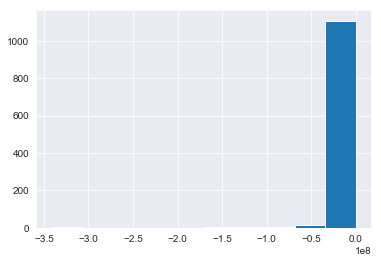

In [7]:
t = data.loc[(prices<0), '（金额）ZWPZFL_JE']
print(len(t.index))
plt.hist(t)

7209


(array([2402., 1001.,  861.,  645.,  542.,  497.,  386.,  336.,  279.,
         260.]), array([1.000000e-02, 9.999090e+02, 1.999808e+03, 2.999707e+03,
        3.999606e+03, 4.999505e+03, 5.999404e+03, 6.999303e+03,
        7.999202e+03, 8.999101e+03, 9.999000e+03]), <a list of 10 Patch objects>)

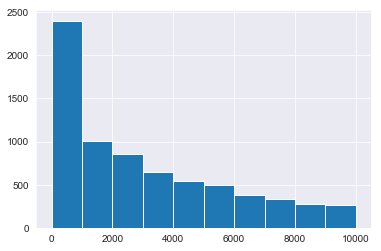

In [8]:
t = data.loc[(prices>0) & (prices<10000), '（金额）ZWPZFL_JE']
print(len(t.index))
plt.hist(t)

6343


(array([1939., 1103.,  775.,  566.,  599.,  325.,  316.,  276.,  219.,
         225.]),
 array([10000.  , 18999.99, 27999.98, 36999.97, 45999.96, 54999.95,
        63999.94, 72999.93, 81999.92, 90999.91, 99999.9 ]),
 <a list of 10 Patch objects>)

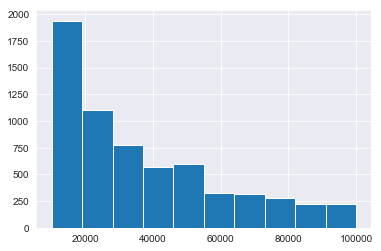

In [9]:
t = data.loc[(prices>=1e4) & (prices<1e5), '（金额）ZWPZFL_JE']
print(len(t.index))
plt.hist(t)

6385


(array([1739., 1142.,  865.,  608.,  704.,  310.,  267.,  329.,  180.,
         241.]),
 array([100000., 189990., 279980., 369970., 459960., 549950., 639940.,
        729930., 819920., 909910., 999900.]),
 <a list of 10 Patch objects>)

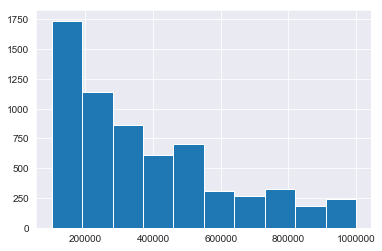

In [10]:
t = data.loc[(prices>=1e5) & (prices<1e6), '（金额）ZWPZFL_JE']
print(len(t.index))
plt.hist(t)

5053


(array([1514.,  892.,  736.,  412.,  530.,  244.,  215.,  179.,  168.,
         163.]),
 array([1000000., 1899976., 2799952., 3699928., 4599904., 5499880.,
        6399856., 7299832., 8199808., 9099784., 9999760.]),
 <a list of 10 Patch objects>)

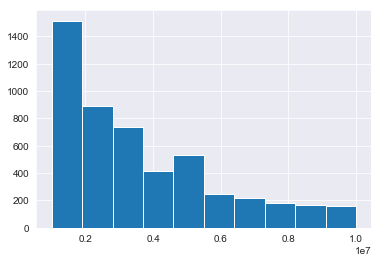

In [11]:
t = data.loc[(prices>=1e6) & (prices<1e7), '（金额）ZWPZFL_JE']
print(len(t.index))
plt.hist(t)

1852


(array([873., 367., 266., 116.,  99.,  33.,  24.,  17.,  32.,  25.]),
 array([10000000.        , 18976708.842     , 27953417.684     ,
        36930126.526     , 45906835.368     , 54883544.21      ,
        63860253.052     , 72836961.894     , 81813670.736     ,
        90790379.57800001, 99767088.42      ]),
 <a list of 10 Patch objects>)

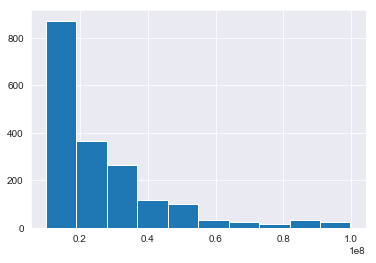

In [12]:
t = data.loc[(prices>=1e7) & (prices<1e8), '（金额）ZWPZFL_JE']
print(len(t.index))
plt.hist(t)

146


(array([90., 19., 17.,  6.,  1.,  8.,  2.,  0.,  2.,  1.]),
 array([1.0000e+08, 1.7547e+08, 2.5094e+08, 3.2641e+08, 4.0188e+08,
        4.7735e+08, 5.5282e+08, 6.2829e+08, 7.0376e+08, 7.7923e+08,
        8.5470e+08]),
 <a list of 10 Patch objects>)

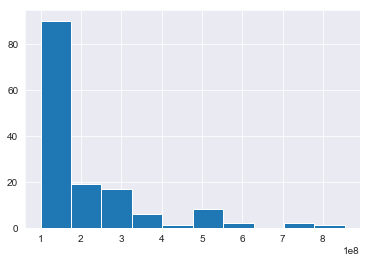

In [13]:
t = data.loc[(prices>=1e8) & (prices<1e9), '（金额）ZWPZFL_JE']
print(len(t.index))
plt.hist(t)

4


(array([3., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([1.31152634e+09, 1.80636646e+09, 2.30120659e+09, 2.79604671e+09,
        3.29088684e+09, 3.78572696e+09, 4.28056709e+09, 4.77540721e+09,
        5.27024734e+09, 5.76508746e+09, 6.25992759e+09]),
 <a list of 10 Patch objects>)

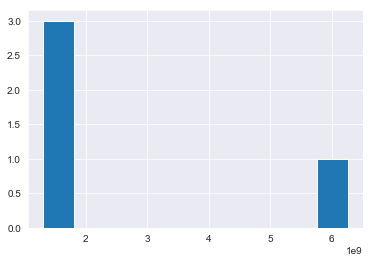

In [14]:
t = data.loc[(prices>=1e9) & (prices<1e10), '（金额）ZWPZFL_JE']
print(len(t.index))
plt.hist(t)

In [15]:
prices = data['（金额）ZWPZFL_JE']
# data.loc[(prices>0)&(prices<10000), '（金额）ZWPZFL_JE'] = 0
# data.loc[prices<0, '（金额）ZWPZFL_JE'] = -1
prices = data['（金额）ZWPZFL_JE']
prices.value_counts(bins=2)

(-348011015.157, 2959258955.215]    28131
(2959258955.215, 6259927588.32]         1
Name: （金额）ZWPZFL_JE, dtype: int64

Text(0.5, 1.0, 'Price Distribution')

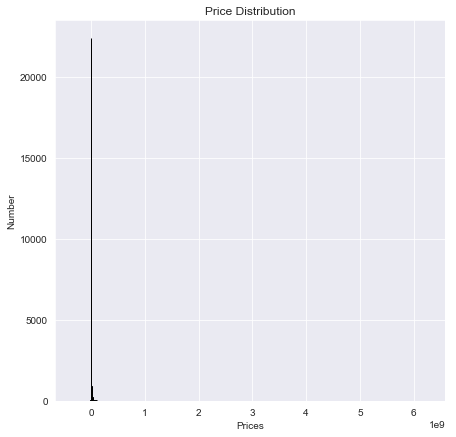

In [16]:
plt.figure(figsize=(7, 7))
plt.hist(prices,  density=False, alpha=1,
        histtype='bar', color='steelblue', 
        edgecolor='k', bins=1000)
# plt.axis([-1, 1, 0, 30000])
plt.xlabel('Prices')
plt.ylabel('Number')
plt.title('Price Distribution')

In [17]:
data.head()

,ZWPZFL_DWBH（单位编号）,（凭证内码）ZWPZFL_PZNM,（分录内码）ZWPZFL_FLNM,（分录编号）ZWPZFL_FLBH,（科目编号）ZWPZFL_KMBH,（摘要）ZWPZFL_ZY,（金额）ZWPZFL_JE,（记账方向）ZWPZFL_JZFX,（对方科目）ZWPZFL_DFKM,ZWPZFL_DFKMYJ
1,A63118930507000000,17,39,2,1004001,收到天津东丽项目工程款,1753013.0,2,1.002003e+09,1002.0
3,A63118930507000000,16,41,2,1004001,收到高雅机电有限公司履约保证金,5000.0,2,1.002003e+09,1002.0
5,A63118930507000000,14,49,2,1004001,收到大宁中心项目工程款,9632017.0,2,1.002003e+09,1002.0
6,A63118930507000000,18,54,2,1004001,收到上海奉业金属有限公司往来款,1000000.0,2,1.002003e+09,1002.0
8,A63118930507000000,19,56,2,1004001,收到东盟和城项目往来款,5000000.0,2,1.002003e+09,1002.0


In [18]:
data['（对方科目）ZWPZFL_DFKM'] = data['（对方科目）ZWPZFL_DFKM'].apply(lambda x: 1002.0 
                                                                    if pd.isnull(x) 
                                                                    else float(str(x)[0:4]))
data.head()

,ZWPZFL_DWBH（单位编号）,（凭证内码）ZWPZFL_PZNM,（分录内码）ZWPZFL_FLNM,（分录编号）ZWPZFL_FLBH,（科目编号）ZWPZFL_KMBH,（摘要）ZWPZFL_ZY,（金额）ZWPZFL_JE,（记账方向）ZWPZFL_JZFX,（对方科目）ZWPZFL_DFKM,ZWPZFL_DFKMYJ
1,A63118930507000000,17,39,2,1004001,收到天津东丽项目工程款,1753013.0,2,1002.0,1002.0
3,A63118930507000000,16,41,2,1004001,收到高雅机电有限公司履约保证金,5000.0,2,1002.0,1002.0
5,A63118930507000000,14,49,2,1004001,收到大宁中心项目工程款,9632017.0,2,1002.0,1002.0
6,A63118930507000000,18,54,2,1004001,收到上海奉业金属有限公司往来款,1000000.0,2,1002.0,1002.0
8,A63118930507000000,19,56,2,1004001,收到东盟和城项目往来款,5000000.0,2,1002.0,1002.0


In [19]:
pd.isnull(data['ZWPZFL_DWBH（单位编号）']).sum()

0

In [20]:
len(data['ZWPZFL_DWBH（单位编号）'].unique())

138

In [21]:
dwbh = dict(enumerate(data['ZWPZFL_DWBH（单位编号）'].unique()))
dwbh_map = dict((v, k) for (k, v) in dwbh.items())
data['ZWPZFL_DWBH（单位编号）'] = data['ZWPZFL_DWBH（单位编号）'].apply(lambda x: dwbh_map[x])
data.head()

,ZWPZFL_DWBH（单位编号）,（凭证内码）ZWPZFL_PZNM,（分录内码）ZWPZFL_FLNM,（分录编号）ZWPZFL_FLBH,（科目编号）ZWPZFL_KMBH,（摘要）ZWPZFL_ZY,（金额）ZWPZFL_JE,（记账方向）ZWPZFL_JZFX,（对方科目）ZWPZFL_DFKM,ZWPZFL_DFKMYJ
1,0,17,39,2,1004001,收到天津东丽项目工程款,1753013.0,2,1002.0,1002.0
3,0,16,41,2,1004001,收到高雅机电有限公司履约保证金,5000.0,2,1002.0,1002.0
5,0,14,49,2,1004001,收到大宁中心项目工程款,9632017.0,2,1002.0,1002.0
6,0,18,54,2,1004001,收到上海奉业金属有限公司往来款,1000000.0,2,1002.0,1002.0
8,0,19,56,2,1004001,收到东盟和城项目往来款,5000000.0,2,1002.0,1002.0


In [22]:
print(len(data['（凭证内码）ZWPZFL_PZNM'].unique()))
print(pd.isnull(data['（凭证内码）ZWPZFL_PZNM']).sum())

2583
0


In [23]:
print(len(data['（分录内码）ZWPZFL_FLNM'].unique()))
print(pd.isnull(data['（分录内码）ZWPZFL_FLNM']).sum())

6107
0


In [24]:
print(len(data['（分录编号）ZWPZFL_FLBH'].unique()))
print(pd.isnull(data['（分录编号）ZWPZFL_FLBH']).sum())

99
0


In [25]:
print(len(data['（科目编号）ZWPZFL_KMBH'].unique()))
print(pd.isnull(data['（科目编号）ZWPZFL_KMBH']).sum())

378
0


In [26]:
norm = data['（科目编号）ZWPZFL_KMBH'].max()
# data['（科目编号）ZWPZFL_KMBH'] = data['（科目编号）ZWPZFL_KMBH'].apply(lambda x: x/norm)
kmbh = dict(enumerate(data['（科目编号）ZWPZFL_KMBH'].unique()))
kmbh_map = dict((v, k) for (k, v) in kmbh.items())
data['（科目编号）ZWPZFL_KMBH'] = data['（科目编号）ZWPZFL_KMBH'].apply(lambda x: kmbh_map[x])
data.head(10)

,ZWPZFL_DWBH（单位编号）,（凭证内码）ZWPZFL_PZNM,（分录内码）ZWPZFL_FLNM,（分录编号）ZWPZFL_FLBH,（科目编号）ZWPZFL_KMBH,（摘要）ZWPZFL_ZY,（金额）ZWPZFL_JE,（记账方向）ZWPZFL_JZFX,（对方科目）ZWPZFL_DFKM,ZWPZFL_DFKMYJ
1,0,17,39,2,0,收到天津东丽项目工程款,1753013.0,2,1002.0,1002.0
3,0,16,41,2,0,收到高雅机电有限公司履约保证金,5000.0,2,1002.0,1002.0
5,0,14,49,2,0,收到大宁中心项目工程款,9632017.0,2,1002.0,1002.0
6,0,18,54,2,0,收到上海奉业金属有限公司往来款,1000000.0,2,1002.0,1002.0
8,0,19,56,2,0,收到东盟和城项目往来款,5000000.0,2,1002.0,1002.0
10,0,23,65,2,0,收到吴江厂房工程款,2084300.0,2,1002.0,1002.0
12,0,15,67,2,0,收到建工股份有限公司往来款,6000000.0,2,1002.0,1002.0
14,0,4,73,2,0,收到沪杭高铁项目往来款,250000.0,2,1002.0,1002.0
16,0,3,75,2,1,收到上海圣明建设灵业有限公司济南鑫苑项目保证金,3000000.0,2,1002.0,1002.0
18,0,2,77,2,0,收到柳州独秀苑项目往来款,12920000.0,2,1002.0,1002.0


In [27]:
print(len(data['（摘要）ZWPZFL_ZY'].unique()))
print(pd.isnull(data['（摘要）ZWPZFL_ZY']).sum())

10891
0


In [28]:
zy = dict(enumerate(data['（摘要）ZWPZFL_ZY'].unique()))
zy_map = dict((v, k) for (k, v) in zy.items())
data['（摘要）ZWPZFL_ZY'] = data['（摘要）ZWPZFL_ZY'].apply(lambda x: zy_map[x])
data.head()

,ZWPZFL_DWBH（单位编号）,（凭证内码）ZWPZFL_PZNM,（分录内码）ZWPZFL_FLNM,（分录编号）ZWPZFL_FLBH,（科目编号）ZWPZFL_KMBH,（摘要）ZWPZFL_ZY,（金额）ZWPZFL_JE,（记账方向）ZWPZFL_JZFX,（对方科目）ZWPZFL_DFKM,ZWPZFL_DFKMYJ
1,0,17,39,2,0,0,1753013.0,2,1002.0,1002.0
3,0,16,41,2,0,1,5000.0,2,1002.0,1002.0
5,0,14,49,2,0,2,9632017.0,2,1002.0,1002.0
6,0,18,54,2,0,3,1000000.0,2,1002.0,1002.0
8,0,19,56,2,0,4,5000000.0,2,1002.0,1002.0


In [29]:
data.drop(columns=['（记账方向）ZWPZFL_JZFX', '（对方科目）ZWPZFL_DFKM', 'ZWPZFL_DFKMYJ'], inplace=True)
data.head(10)

,ZWPZFL_DWBH（单位编号）,（凭证内码）ZWPZFL_PZNM,（分录内码）ZWPZFL_FLNM,（分录编号）ZWPZFL_FLBH,（科目编号）ZWPZFL_KMBH,（摘要）ZWPZFL_ZY,（金额）ZWPZFL_JE
1,0,17,39,2,0,0,1753013.0
3,0,16,41,2,0,1,5000.0
5,0,14,49,2,0,2,9632017.0
6,0,18,54,2,0,3,1000000.0
8,0,19,56,2,0,4,5000000.0
10,0,23,65,2,0,5,2084300.0
12,0,15,67,2,0,6,6000000.0
14,0,4,73,2,0,7,250000.0
16,0,3,75,2,1,8,3000000.0
18,0,2,77,2,0,9,12920000.0


In [30]:
data.shape

(28132, 7)

In [31]:
data.loc[(prices<0), '（金额）ZWPZFL_JE'] = -1
data.loc[(prices>=0) & (prices<1e4), '（金额）ZWPZFL_JE'] = 0
data.loc[(prices>=1e4) & (prices<1e5), '（金额）ZWPZFL_JE'] = 1
data.loc[(prices>=1e5) & (prices<1e6), '（金额）ZWPZFL_JE'] = 2
data.loc[(prices>=1e6) & (prices<1e7), '（金额）ZWPZFL_JE'] = 3
data.loc[(prices>=1e7) & (prices<1e8), '（金额）ZWPZFL_JE'] = 4
data.loc[(prices>=1e8), '（金额）ZWPZFL_JE'] = 5
data.head(10)

,ZWPZFL_DWBH（单位编号）,（凭证内码）ZWPZFL_PZNM,（分录内码）ZWPZFL_FLNM,（分录编号）ZWPZFL_FLBH,（科目编号）ZWPZFL_KMBH,（摘要）ZWPZFL_ZY,（金额）ZWPZFL_JE
1,0,17,39,2,0,0,3.0
3,0,16,41,2,0,1,0.0
5,0,14,49,2,0,2,3.0
6,0,18,54,2,0,3,3.0
8,0,19,56,2,0,4,3.0
10,0,23,65,2,0,5,3.0
12,0,15,67,2,0,6,3.0
14,0,4,73,2,0,7,2.0
16,0,3,75,2,1,8,3.0
18,0,2,77,2,0,9,4.0


In [32]:
def standardize(raw_data):
    return ((raw_data - np.mean(raw_data, axis=0)) / np.std(raw_data, axis=0))
numerics = ['ZWPZFL_DWBH（单位编号）',
         '（凭证内码）ZWPZFL_PZNM',
         '（分录内码）ZWPZFL_FLNM',
         '（分录编号）ZWPZFL_FLBH',
         '（科目编号）ZWPZFL_KMBH',
         '（摘要）ZWPZFL_ZY']
data[numerics] = standardize(data[numerics])
data.head(10)

,ZWPZFL_DWBH（单位编号）,（凭证内码）ZWPZFL_PZNM,（分录内码）ZWPZFL_FLNM,（分录编号）ZWPZFL_FLBH,（科目编号）ZWPZFL_KMBH,（摘要）ZWPZFL_ZY,（金额）ZWPZFL_JE
1,-1.21825,-0.693739,-0.725530,-0.271972,-0.694948,-1.137026,3.0
3,-1.21825,-0.695729,-0.724469,-0.271972,-0.694948,-1.136730,0.0
5,-1.21825,-0.699707,-0.720227,-0.271972,-0.694948,-1.136435,3.0
6,-1.21825,-0.691750,-0.717575,-0.271972,-0.694948,-1.136139,3.0
8,-1.21825,-0.689761,-0.716514,-0.271972,-0.694948,-1.135843,3.0
10,-1.21825,-0.681804,-0.711741,-0.271972,-0.694948,-1.135547,3.0
12,-1.21825,-0.697718,-0.710680,-0.271972,-0.694948,-1.135251,3.0
14,-1.21825,-0.719600,-0.707498,-0.271972,-0.694948,-1.134955,2.0
16,-1.21825,-0.721589,-0.706438,-0.271972,-0.678015,-1.134659,3.0
18,-1.21825,-0.723578,-0.705377,-0.271972,-0.694948,-1.134363,4.0


In [33]:
data.to_csv('/Users/shanewang/Desktop/lyf/processed_data.csv')

## Model and train

In [34]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
import xgboost as xgb
import seaborn as sns

In [35]:
input = data[numerics]
label = data['（金额）ZWPZFL_JE']

In [36]:
smt = SMOTE(random_state=20)

X_train_old, X_test, Y_train_old, Y_test = train_test_split(input, label, test_size=0.20, random_state=0)

X_train, Y_train = smt.fit_sample(X_train_old, Y_train_old)
X_train = pd.DataFrame(X_train, columns=list(X_train_old.columns))
print("nums of train/test set: ", len(X_train), len(X_test), len(Y_train), len(Y_test))

nums of train/test set:  40215 5627 40215 5627


--- Decision Tree ---
Accuracy:  0.4858716900657544
F1 score:  0.48776968590043224
Confusion matrix: 
 [[104  18  16  28  31  13   3]
 [ 29 922 312 107  76  16   2]
 [ 48 288 581 238  85  30   5]
 [ 43  95 240 560 232  67   6]
 [ 35  53  96 252 437 141   9]
 [ 30  18  22  63 114 125   7]
 [  3   0   3   4   4  11   5]]
Overall report: 
               precision    recall  f1-score   support

        -1.0       0.36      0.49      0.41       213
         0.0       0.66      0.63      0.65      1464
         1.0       0.46      0.46      0.46      1275
         2.0       0.45      0.45      0.45      1243
         3.0       0.45      0.43      0.44      1023
         4.0       0.31      0.33      0.32       379
         5.0       0.14      0.17      0.15        30

   micro avg       0.49      0.49      0.49      5627
   macro avg       0.40      0.42      0.41      5627
weighted avg       0.49      0.49      0.49      5627



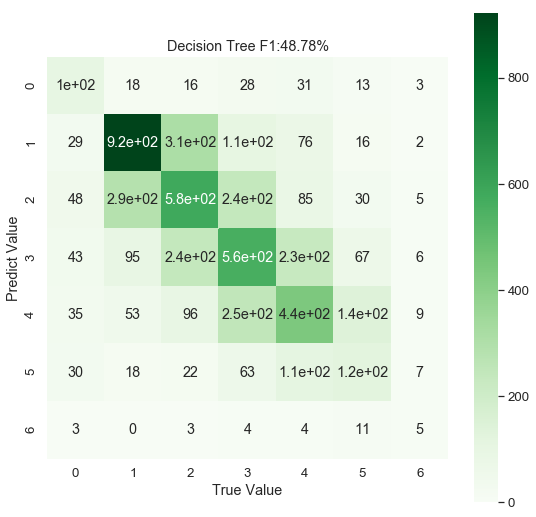

In [37]:
#-------- Decision Tree --------#
print('--- Decision Tree ---')
tree = DecisionTreeClassifier()

tree.fit(X_train, Y_train)

Y_test_predict = tree.predict(X_test)
acc = accuracy_score(Y_test, Y_test_predict)
mat = confusion_matrix(Y_test, Y_test_predict)
f1 = f1_score(Y_test, Y_test_predict, average='weighted')
print("Accuracy: ", acc)
print("F1 score: ", f1)
print("Confusion matrix: \n", mat)

plt.figure(figsize=(9, 9))
sns.set(font_scale=1.2)
sns.heatmap(mat, square=True, annot=True, cmap='Greens')
plt.xlabel('True Value')
plt.ylabel('Predict Value')
plt.title('Decision Tree F1:{0:.2f}%'.format(f1 * 100))

print('Overall report: \n', classification_report(Y_test, Y_test_predict))

--- XGBoost model ---
Accuracy:  0.5354540607783899
F1 score:  0.5353865755269338
Confusion matrix: 
 [[ 124   12   14   25   22   14    2]
 [  19 1002  277  110   46   10    0]
 [  33  298  638  216   68   19    3]
 [  33   80  252  617  211   45    5]
 [  26   51   77  251  478  135    5]
 [  17   12   12   44  143  145    6]
 [   3    1    1    3    3   10    9]]
Overall report: 
               precision    recall  f1-score   support

        -1.0       0.49      0.58      0.53       213
         0.0       0.69      0.68      0.69      1464
         1.0       0.50      0.50      0.50      1275
         2.0       0.49      0.50      0.49      1243
         3.0       0.49      0.47      0.48      1023
         4.0       0.38      0.38      0.38       379
         5.0       0.30      0.30      0.30        30

   micro avg       0.54      0.54      0.54      5627
   macro avg       0.48      0.49      0.48      5627
weighted avg       0.54      0.54      0.54      5627



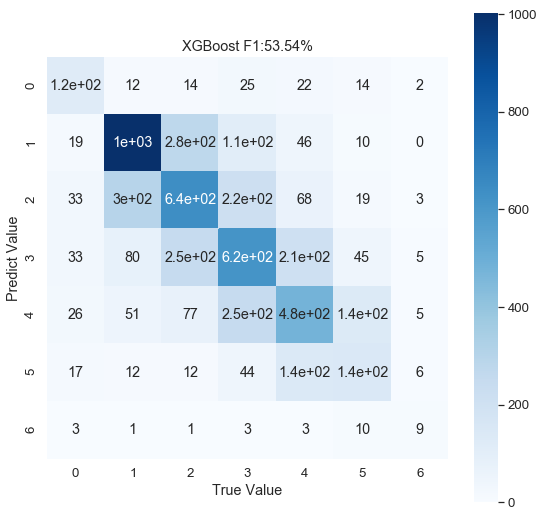

In [38]:
#-------- XGboost ---------#
print('--- XGBoost model ---')
xg_reg = xgb.XGBClassifier(n_estimators=100, max_depth=20, criterion="entropy")

# print("Cross Validation score: ", np.mean(cross_val_score(xg_reg, X_train, Y_train, cv=10)))  # 10-fold 交叉验证
xg_reg.fit(X_train, Y_train)

Y_test_predict = xg_reg.predict(X_test)
acc = accuracy_score(Y_test, Y_test_predict)
mat = confusion_matrix(Y_test, Y_test_predict)
f1 = f1_score(Y_test, Y_test_predict, average='weighted')
print("Accuracy: ", acc)
print("F1 score: ", f1)
print("Confusion matrix: \n", mat)

plt.figure(figsize=(9, 9))
sns.set(font_scale=1.2)
sns.heatmap(mat, square=True, annot=True, cmap='Blues')
plt.xlabel('True Value')
plt.ylabel('Predict Value')
plt.title('XGBoost F1:{0:.2f}%'.format(f1 * 100))

print('Overall report: \n', classification_report(Y_test, Y_test_predict))

--- Random-forest model ---
Accuracy:  0.5187488892838102
F1 score:  0.5196496083645884
Confusion matrix: 
 [[127   9  12  19  27  17   2]
 [ 15 987 289 105  45  23   0]
 [ 35 296 610 215  89  25   5]
 [ 43  81 248 579 216  69   7]
 [ 33  48  79 246 458 155   4]
 [ 23  17  12  41 128 150   8]
 [  3   2   0   2   6   9   8]]
Overall report: 
               precision    recall  f1-score   support

        -1.0       0.46      0.60      0.52       213
         0.0       0.69      0.67      0.68      1464
         1.0       0.49      0.48      0.48      1275
         2.0       0.48      0.47      0.47      1243
         3.0       0.47      0.45      0.46      1023
         4.0       0.33      0.40      0.36       379
         5.0       0.24      0.27      0.25        30

   micro avg       0.52      0.52      0.52      5627
   macro avg       0.45      0.47      0.46      5627
weighted avg       0.52      0.52      0.52      5627



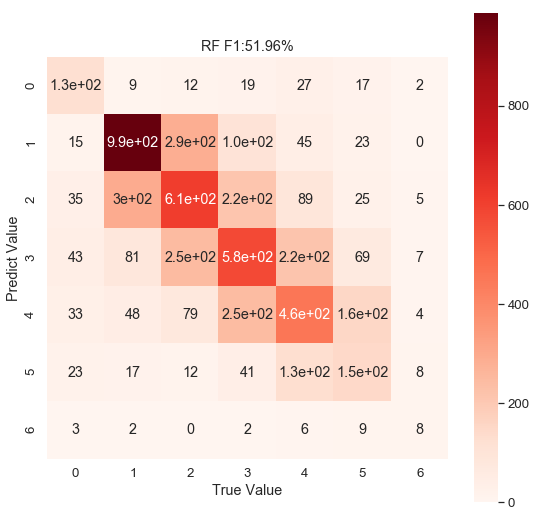

In [39]:
# ------- RF --------#
print('--- Random-forest model ---')

forest = RandomForestClassifier(n_estimators=100, max_depth=20, criterion="entropy")
# print("Cross Validation Score: ", np.mean(cross_val_score(forest, X_train, Y_train, cv=10)))
forest.fit(X_train, Y_train)

Y_test_predict = forest.predict(X_test)
acc = accuracy_score(Y_test, Y_test_predict)
mat = confusion_matrix(Y_test, Y_test_predict)
f1 = f1_score(Y_test, Y_test_predict, average='weighted')
print("Accuracy: ", acc)
print("F1 score: ", f1)
print("Confusion matrix: \n", mat)

plt.figure(figsize=(9, 9))
sns.set(font_scale=1.2)
sns.heatmap(mat, square=True, annot=True, cmap='Reds')
plt.xlabel('True Value')
plt.ylabel('Predict Value')
plt.title('RF F1:{0:.2f}%'.format(f1 * 100))

print('Overall report: \n', classification_report(Y_test, Y_test_predict))